In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import missingno as mn

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

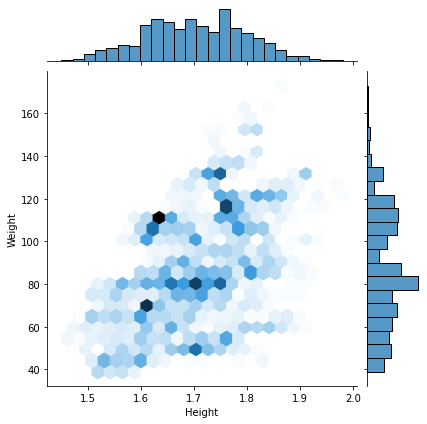

In [3]:
sns.jointplot(x='Height',y='Weight',data =df, kind = 'hex')

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.rename(columns = {'family_history_with_overweight': 'family', 'FAVC': 'caloric_food', 'FCVC': 'vegetables', 'NCP': 'n_meal', 'CAEC':'eat_bet_meal', 'SMOKE': 'smoking', 'CH2O' : 'water', 'SCC' : 'monitor_cal', 'FAF' : 'physical_active', 'TUE': 'screen_time', 'CALC': 'alcohol', 'MTRANS': 'transport', 'NObeyesdad': 'obesity'}, inplace=True)

In [12]:
frequency=['no','Sometimes','Frequently','Always']
interval=range(4)
yn=['no','yes']
binary=range(2)
df.family.replace(to_replace=yn[:],
           value=binary,
           inplace=True)
obesity_levels=['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III']
df.obesity.replace(to_replace=obesity_levels[:],
                  value=range(7),
                  inplace=True)

In [13]:
df

,Gender,Age,Height,Weight,family,caloric_food,vegetables,n_meal,eat_bet_meal,smoking,water,monitor_cal,physical_active,screen_time,alcohol,transport,obesity
0,Female,21.000000,1.620000,64.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,0
1,Female,21.000000,1.520000,56.000000,1,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,0
2,Male,23.000000,1.800000,77.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,0
3,Male,27.000000,1.800000,87.000000,0,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,1
4,Male,22.000000,1.780000,89.800000,0,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,1,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,1,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,1,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,6


In [28]:
%X = df.Weight

In [36]:
X=np.transpose(np.array([df.Weight,df.Height,df.family]))

In [37]:
X

array([[ 64.      ,   1.62    ,   1.      ],
       [ 56.      ,   1.52    ,   1.      ],
       [ 77.      ,   1.8     ,   1.      ],
       ...,
       [133.689352,   1.752206,   1.      ],
       [133.346641,   1.73945 ,   1.      ],
       [133.472641,   1.738836,   1.      ]])

In [38]:
y = df.obesity

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)

In [40]:
X_train

array([[ 99.      ,   1.85    ,   1.      ],
       [104.768318,   1.668931,   1.      ],
       [111.949972,   1.656465,   1.      ],
       ...,
       [ 90.004046,   1.686904,   1.      ],
       [121.204668,   1.775416,   1.      ],
       [ 69.168978,   1.645511,   1.      ]])